
# Using Python AST module directly

"The ast module helps Python applications to process trees of the Python abstract syntax grammar."

In [1]:
import ast
from astpretty import pprint

text = input('calc> ')
tree = ast.parse(text, mode='eval')
pprint(tree, show_offsets=False)
eval(compile(tree, filename='', mode='eval'))

calc> 1+1
Expression(
    body=BinOp(
        left=Constant(value=1, kind=None),
        op=Add(),
        right=Constant(value=1, kind=None),
    ),
)


2

# AST Grammar

https://docs.python.org/3/library/ast.html#abstract-grammar  

AST Grammar for mathematical expressions.

    expr = BinOp(expr left, operator op, expr right)
         | UnaryOp(unaryop op, expr operand)
         | Constant(constant value)

    operator = Add | Sub | Mult | Div

    unaryop = UAdd | USub


# CALC (Node module)

Data Structures for the Abstract Syntax Tree.

Node
 - Number
 - BinOp
    - Plus
    - Minus
    - Times
    - Divide
    - Pow
 - UnaryOp
    - UPlus
    - UMinus

In [2]:
import calc

# Test Number
n = calc.Number(5).value
str(n)

'5'

In [3]:
# Test Binary Operators
n1 = calc.Number(5)
n2 = calc.Number(10.1)

n3 = calc.Plus(n1, n2).evaluate()
n4 = calc.Minus(n1, n2).evaluate()
n5 = calc.Multiply(n1, n2).evaluate()
n6 = calc.Divide(n1, n2).evaluate()
n3, n4, n5, n6

(15.1, -5.1, 50.5, 0.49504950495049505)

In [4]:
# Test Unary Operators
n1 = calc.Number(5)

n7 = calc.UPlus(n1).evaluate()
n8 = calc.UMinus(n1).evaluate()
n7, n8

(5, -5)

In [5]:
# Test Exponential Operator

n9 = calc.Pow(n1, n2).evaluate()
n9

11470888.11609393

In [6]:
# Test combination
# 5 + 3 * -4
n10 = calc.Plus(calc.Number(5), calc.Multiply(calc.Number(3), calc.UMinus(calc.Number(4)))).evaluate()
n10

-7

# CALC (Lexer module)

Lexer converts a sequence of characters into a list of tokens.  In this case, the input string represents a mathematical expression.  A token is a string with an assigned meaning, for example '+' for addition.  A token consists of the token type and optionally a value.

In [7]:
expression = '5+2--1*(8+2.1)+2**2**3'
#expression = '1+2+3'

In [8]:
# Test Lexer
lexer = calc.Lexer(expression)
tokens = lexer.parse()
tokens

[TokenType.NUMBER 5,
 TokenType.PLUS ,
 TokenType.NUMBER 2,
 TokenType.MINUS ,
 TokenType.MINUS ,
 TokenType.NUMBER 1,
 TokenType.MULTIPLY ,
 TokenType.LPAREN ,
 TokenType.NUMBER 8,
 TokenType.PLUS ,
 TokenType.NUMBER 2.1,
 TokenType.RPAREN ,
 TokenType.PLUS ,
 TokenType.NUMBER 2,
 TokenType.POW ,
 TokenType.NUMBER 2,
 TokenType.POW ,
 TokenType.NUMBER 3]

# CALC (Parser module)

Parser takes a list of tokens and builds an AST, based on a specified grammar.  Grammar defines the arrangement of tokens.  In this case, it is a set of rules to produce a mathematical expression. 

In [9]:
# Test Parser
parser = calc.Parser(tokens)
tree = parser.parse()
type(tree)

calc.node.Plus

In [10]:
# Test evaluate
tree.evaluate()

273.1

In [11]:
# Test generate expression
print(tree)

(((5+2)--1*(8+2.1))+2**2**3)


# Visitor Pattern

"The visitor design pattern is a way of separating an algorithm from an object structure on which it operates."

In [12]:
v = calc.Visitor()
result = v.visit(tree)
result

273.1

# AST Visualization

Has two dependancies, install them with:

sudo apt install graphviz  
sudo pip install pydot

In [13]:
v = calc.Visualization()
v.visit(tree)
v.write_png()

5+2--1*(8+2.1)+2**2**3
(((5+2)--1*(8+2.1))+2**2**3)


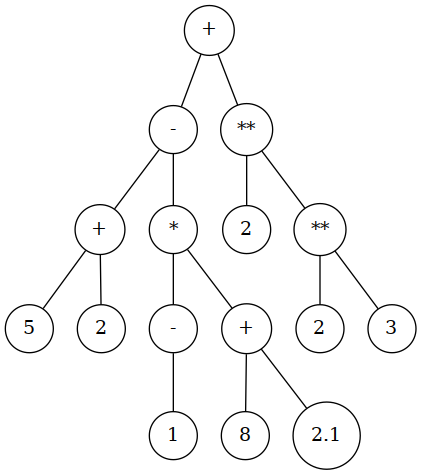

In [14]:
from IPython import display
print(expression)
print(tree)
display.Image('output.png')